Name : Dwi Fitria Astari Lubis
Credit Card Fraud Detection Task 

Build a model to detect fraudulent credit card transactions. Use a dataset containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees, or Random Forests to classify transactions as fraudulent or legitimate.

About the Dataset
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

Key Features:

Unnamed: 0                  = Unique identifier for each transaction           
 1   trans_date_trans_time  = date and time of transaction
 2   cc_num                 = credit card number    
 3   merchant               = place where the person purchase using credit card
 4   category               = category of purchase
 5   amt                    = the transaction amount
 6   first                  = first name credit card owner
 7   last                   = last name credit card owner
 8   gender                 = gender owner of credit card
 9   street                 = location of credit card owner
 10  city                   = location of credit card owner
 11  state                  = location of credit card owner
 12  zip                    = location of credit card owner 
 13  lat                    = (latitude) location of owner
 14  long                   = (longitudinal) location of owner
 15  city_pop               = population of the city
 16  job                    = job of owner if the city
 17  dob                    = birthday of credit owner
 18  trans_num              = unique number of transaction
 19  unix_time              = unique number of time
 20  merch_lat              = (latitude) location of the merchant
 21  merch_long             = (longitudinal) location of the merchant
 22  is_fraud               = Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [35]:
# Data Wrangling
import pandas as pd
import numpy as np

#Encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Statistics / Logistic Regression 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from scipy import stats

#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Confusion Matrix
from sklearn.metrics import confusion_matrix

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Trees
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#Scores
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, cohen_kappa_score, roc_auc_score

#Model turning
from sklearn.model_selection import GridSearchCV

RANDOM_STATE=42
%matplotlib inline

In [3]:
#Load Dataset & Data Preprocessing
df = pd.read_csv("C:\\Users\\Dwi Fitria\\Intern\\Encryptix\\Task 2\\fraudTrain.csv")
df_test = pd.read_csv("C:\\Users\\Dwi Fitria\\Intern\\Encryptix\\Task 2\\fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
# Check the data type of the column
if df['trans_date_trans_time'].dtype != 'datetime64[ns]':
    # Convert to datetime if necessary
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract date and time
df['date'] = df['trans_date_trans_time'].dt.date
df['time'] = df['trans_date_trans_time'].dt.time


In [7]:
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

,Unnamed: 0,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,day_of_week
count,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,2019-10-03 12:47:28.070214144,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,1.280486e+01,3.070604e+00
min,0.000000e+00,2019-01-01 00:00:18,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.241685e+05,2019-06-03 19:12:22.500000,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,7.000000e+00,1.000000e+00
50%,6.483370e+05,2019-10-03 07:35:47,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,1.400000e+01,3.000000e+00
75%,9.725055e+05,2020-01-28 15:02:55.500000,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,1.900000e+01,5.000000e+00
max,1.296674e+06,2020-06-21 12:13:37,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,2.300000e+01,6.000000e+00
std,3.743180e+05,NaN,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,6.817824e+00,2.198153e+00


In [9]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
date                     0
time                     0
transaction_hour         0
year_month               0
day_of_week              0
dtype: int64

no missing value

C:\Users\Dwi Fitria\AppData\Local\Temp\ipykernel_13700\1407103669.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_category.index, y=df_category.values, palette='viridis')


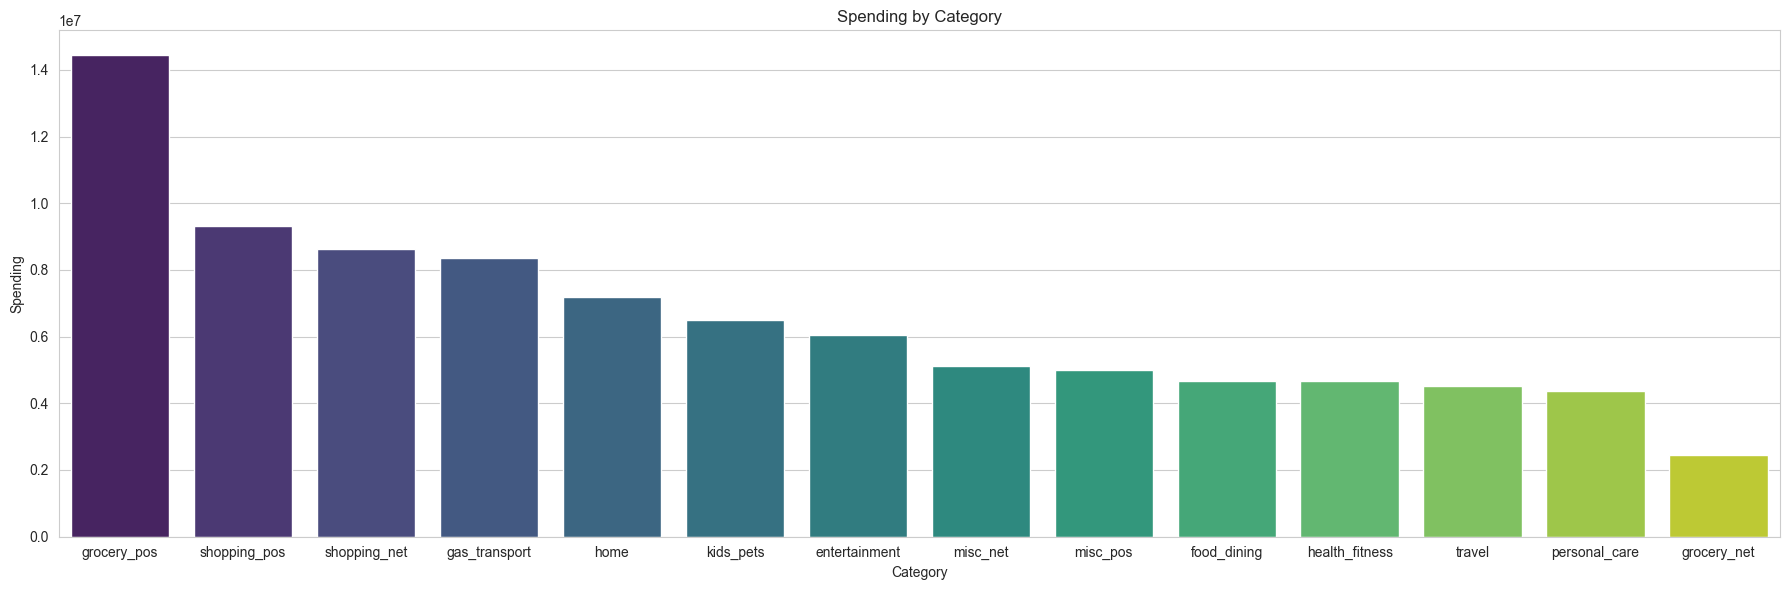

In [10]:
#Category vs Spending amount and Category vs Spending time
df_category = df.groupby('category')['amt'].sum().sort_values(ascending=False)
df_day_of_week = df.groupby('day_of_week')['amt'].sum()

sns.set_style('whitegrid')

plt.figure(figsize=(18, 6))

# First chart
plt.subplot(1, 1, 1)
sns.barplot(x=df_category.index, y=df_category.values, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Spending')
plt.title('Spending by Category')

plt.tight_layout()
plt.show()

The Grocery_pos is the most of them used Credit card for their transactions

C:\Users\Dwi Fitria\AppData\Local\Temp\ipykernel_13700\3399642041.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_day_of_week.index, y=df_day_of_week.values, palette='viridis')


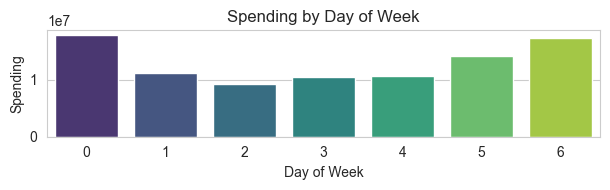

In [11]:
# Second chart
plt.figure(figsize=(12, 2))
plt.subplot(1, 2, 2)
sns.barplot(x=df_day_of_week.index, y=df_day_of_week.values, palette='viridis')
plt.xlabel('Day of Week')
plt.ylabel('Spending')
plt.title('Spending by Day of Week')

plt.tight_layout()
plt.show()

Monday and Sunday of the week have highest credit card transactions

In [12]:
#spending by gender, spending by month
df_gender = df.groupby('gender')['amt'].sum()
df_month = df.groupby('year_month')['amt'].sum()

C:\Users\Dwi Fitria\AppData\Local\Temp\ipykernel_13700\2816283907.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_gender.index, y=df_gender.values, palette='viridis')


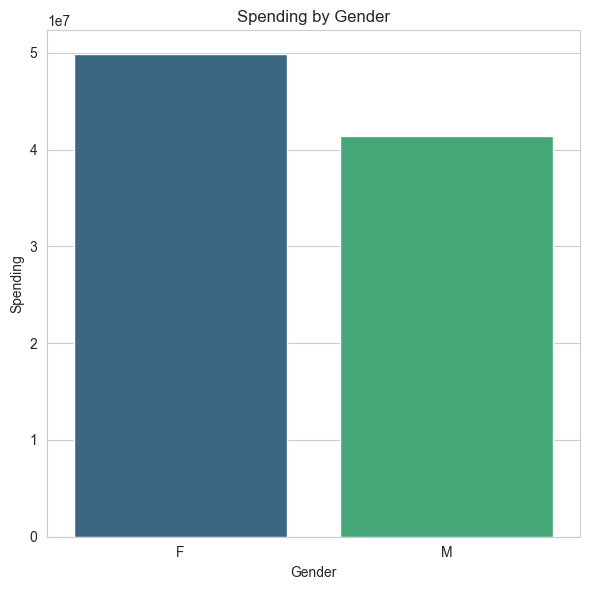

In [13]:
sns.set_style('whitegrid')

plt.figure(figsize=(6, 6))

# First chart
plt.subplot(1, 1, 1)
sns.barplot(x=df_gender.index, y=df_gender.values, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Spending')
plt.title('Spending by Gender')
plt.tight_layout()
plt.show()

Female is the most spending by using credit card

C:\Users\Dwi Fitria\AppData\Local\Temp\ipykernel_13700\1813053094.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_month.index, y=df_month.values, palette='viridis')


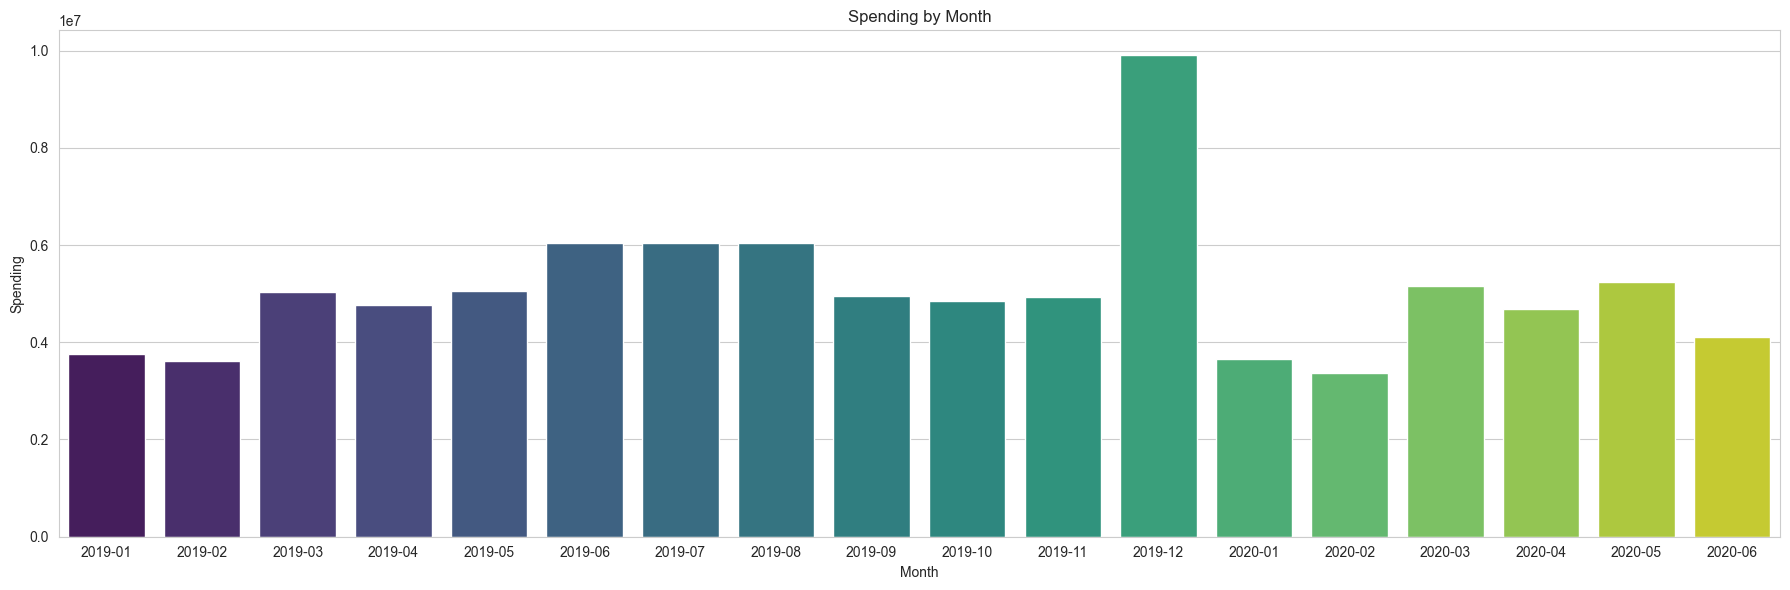

In [14]:
# Second chart
plt.figure(figsize=(18, 6))
plt.subplot(1, 1, 1)
sns.barplot(x=df_month.index, y=df_month.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Spending')
plt.title('Spending by Month')

plt.tight_layout()
plt.show()

December-2019 is the most spending by using credit card

In [16]:
#Encoding Label
categorical_cols = ['trans_date_trans_time', 'gender', 'job', 'category', 'merchant', 'city', 'street', 'first', 'last', 'state', 'dob', 'trans_num', 'date', 'time', 'year_month', 'day_of_week']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df.describe()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_lat,merch_long,is_fraud,date,time,Transaction Hour,Day of Week,transaction_hour,year_month,day_of_week
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,...,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,6.377350e+05,4.171920e+17,3.428585e+02,6.227787e+00,7.035104e+01,1.802624e+02,2.505209e+02,4.525513e-01,4.880344e+02,...,3.853734e+01,-9.022646e+01,5.788652e-03,2.747690e+02,4.789671e+04,1.280486e+01,3.070604e+00,1.280486e+01,8.583182e+00,2.764491e+00
std,3.743180e+05,3.677164e+05,1.308806e+18,2.009519e+02,3.913443e+00,1.603160e+02,9.753379e+01,1.366741e+02,4.977437e-01,2.800608e+02,...,5.109788e+00,1.377109e+01,7.586269e-02,1.484975e+02,2.456550e+04,6.817824e+00,2.198153e+00,6.817824e+00,4.887490e+00,1.859687e+00
min,0.000000e+00,0.000000e+00,6.041621e+10,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.902779e+01,-1.666712e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.241685e+05,3.194735e+05,1.800429e+14,1.650000e+02,3.000000e+00,9.650000e+00,9.400000e+01,1.380000e+02,0.000000e+00,2.520000e+02,...,3.473357e+01,-9.689728e+01,0.000000e+00,1.530000e+02,2.749950e+04,7.000000e+00,1.000000e+00,7.000000e+00,5.000000e+00,1.000000e+00
50%,6.483370e+05,6.380930e+05,3.521417e+15,3.460000e+02,6.000000e+00,4.752000e+01,1.830000e+02,2.520000e+02,0.000000e+00,4.850000e+02,...,3.936568e+01,-8.743839e+01,0.000000e+00,2.750000e+02,5.091800e+04,1.400000e+01,3.000000e+00,1.400000e+01,9.000000e+00,3.000000e+00
75%,9.725055e+05,9.554845e+05,4.642255e+15,5.140000e+02,1.000000e+01,8.314000e+01,2.570000e+02,3.700000e+02,1.000000e+00,7.200000e+02,...,4.195716e+01,-8.023680e+01,0.000000e+00,3.920000e+02,6.873400e+04,1.900000e+01,5.000000e+00,1.900000e+01,1.200000e+01,4.000000e+00
max,1.296674e+06,1.274790e+06,4.992346e+18,6.920000e+02,1.300000e+01,2.894890e+04,3.510000e+02,4.800000e+02,1.000000e+00,9.820000e+02,...,6.751027e+01,-6.695090e+01,1.000000e+00,5.360000e+02,8.639900e+04,2.300000e+01,6.000000e+00,2.300000e+01,1.700000e+01,6.000000e+00


In [17]:
df['is_fraud'].value_counts()/len(df)

is_fraud
0    0.994211
1    0.005789
Name: count, dtype: float64

Based on data, 99% no fraud ; 0,5% fraud

C:\Users\Dwi Fitria\AppData\Local\Temp\ipykernel_13700\3743319898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_fraud', data=df, palette='Set2')


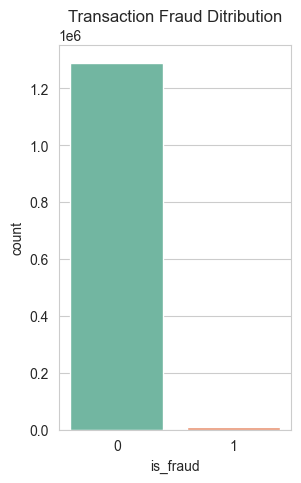

In [18]:
f,ax = plt.subplots(figsize=(3,5))
ax = sns.countplot(x='is_fraud', data=df, palette='Set2')
plt.title("Transaction Fraud Ditribution")
plt.show()

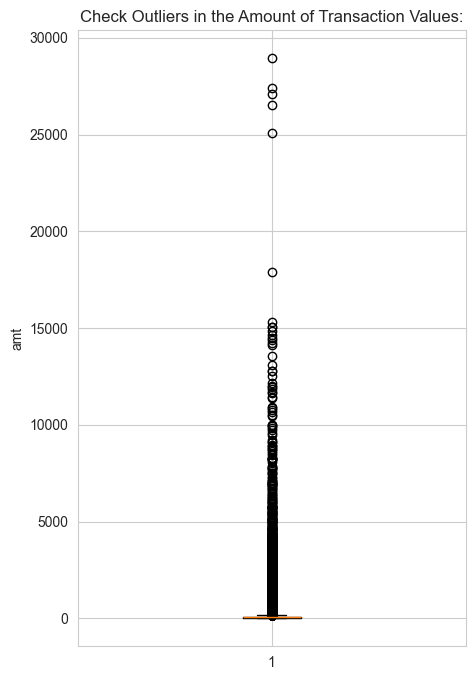

In [19]:
plt.figure(figsize=(5, 8))  # Adjust the figure size as needed
plt.boxplot(df['amt'])
plt.title('Check Outliers in the Amount of Transaction Values:')
plt.ylabel('amt')
plt.show()

C:\Users\Dwi Fitria\AppData\Local\Temp\ipykernel_13700\2959132558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['time'])


Text(0.5, 1.0, 'Distribution of transaction time')

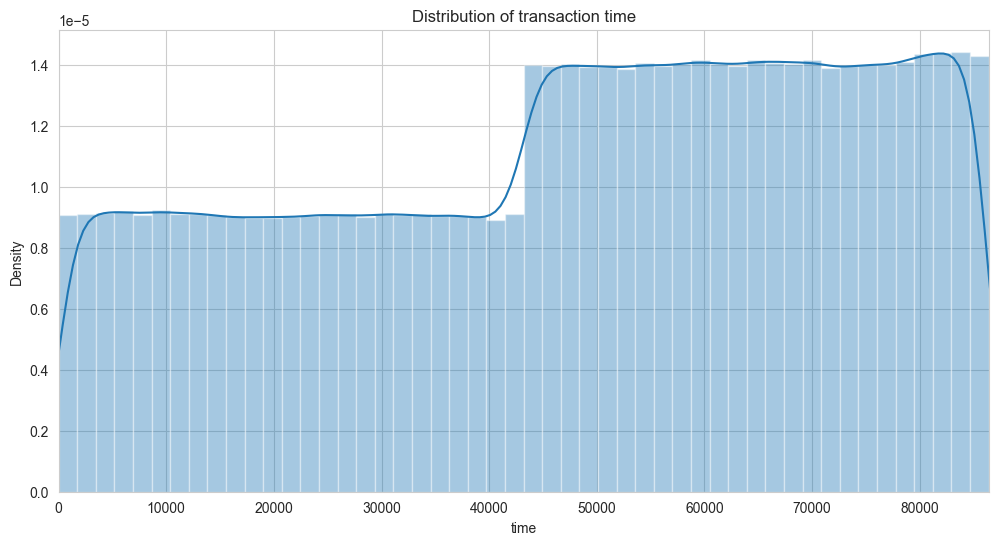

In [20]:
time_val = df['time'].values
plt.figure(figsize=(12,6))
sns.distplot(df['time'])
plt.xlim(min(time_val),max(time_val))
plt.title("Distribution of transaction time")

The fall might happen due to night time.

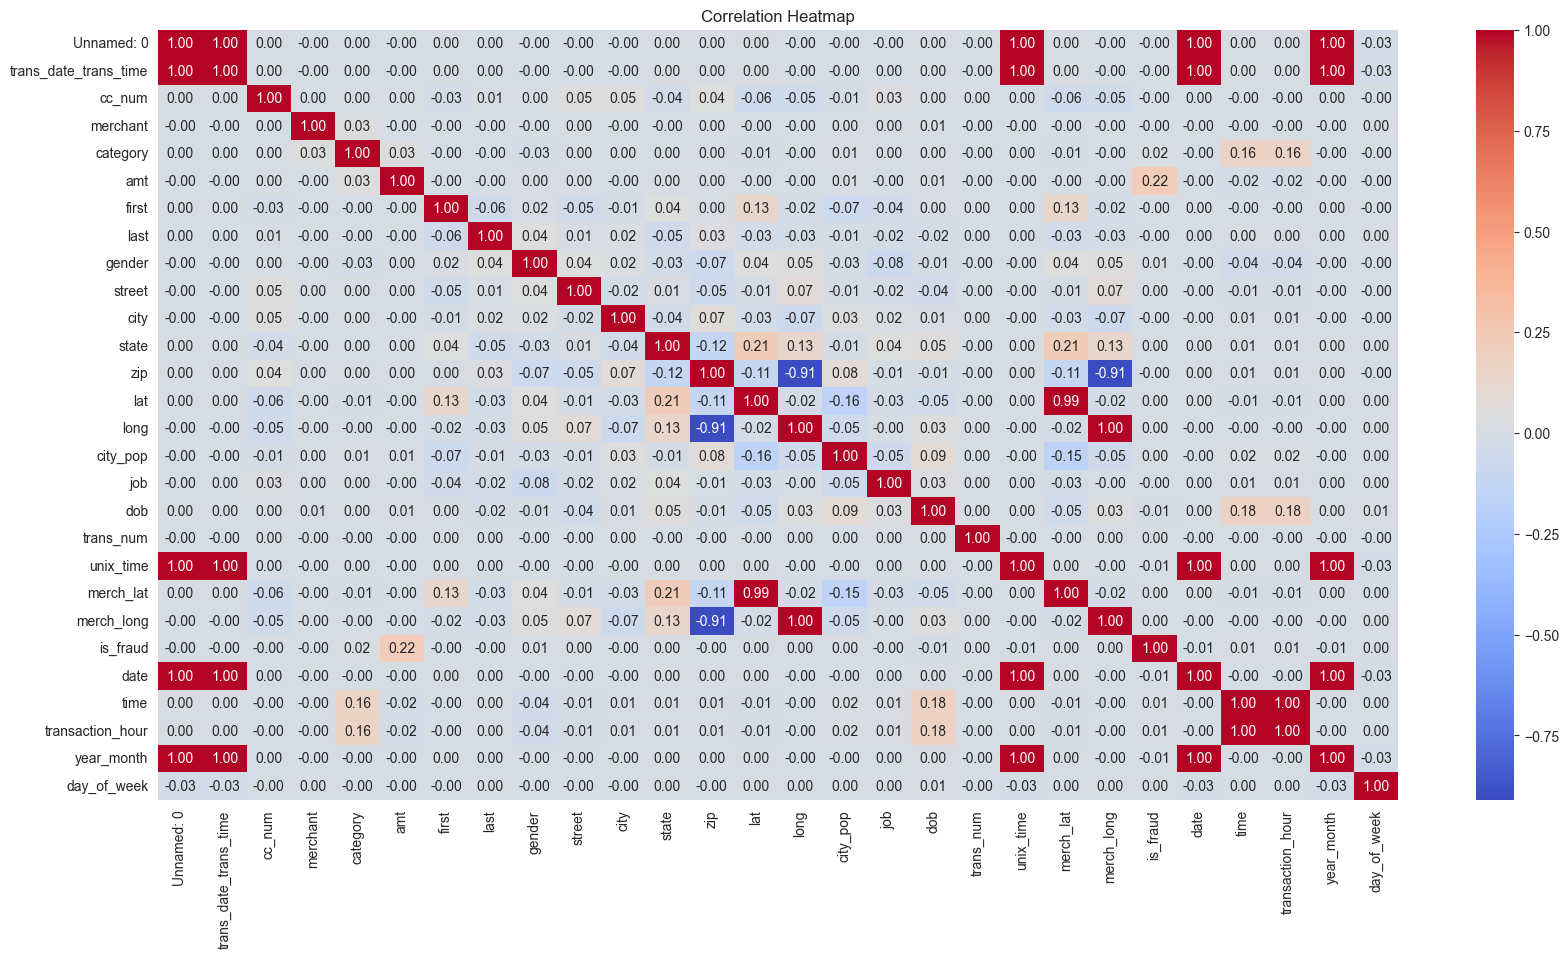

In [21]:
# Correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [48]:
# Select relevant features
features = ['Unnamed: 0','trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'unix_time', 'year_month', 'date', 'street', 'city', 'state', 'zip']
X = df[features]
y = df['is_fraud']

# Encode categorical features
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Scale numerical features (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [49]:
#Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
#Make Prediction
y_pred = model.predict(X_test)

In [52]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:",
 f1)
print("Cohen's Kappa Score:", kappa)
print("AUC Score:", auc)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.993595156843465
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Cohen's Kappa Score: -0.0009960801999326918
AUC Score: 0.4997265481062002
Confusion Matrix:
 [[257674    141]
 [  1520      0]]


In [53]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l2']  # Restrict penalty to 'l2' only
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(solver='liblinear'), param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

In [45]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Parameters:", best_params)


Best Parameters: {'C': 0.01, 'penalty': 'l2'}
